In [120]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, loguniform


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier


from sklearn.metrics import f1_score, classification_report, confusion_matrix


In [65]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)


In [66]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [67]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [68]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
# Scale the features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [70]:
# PCA for dimentionality reduction and feature engineering
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)


In [71]:
# Apply RFE to select the top 15 features
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=15)
X_train_rfe = rfe.fit_transform(X_train_sc, y_train)
X_test_rfe = rfe.transform(X_test_sc)


## Random Forest
F1 --------> 0.9790

In [72]:
# random forest f1 score 
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
rfc.fit(X_train_sc, y_train)

y_pred_rfc = rfc.predict(X_test_sc)
rfc_f1 = f1_score(y_test, y_pred_rfc)


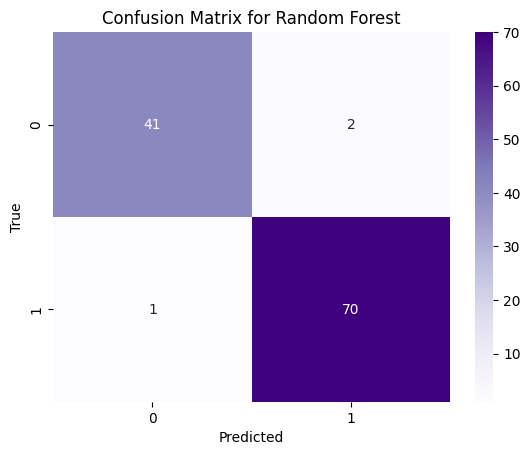

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Random Forest F1-score: 0.9790


In [73]:
# Display confusion matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, fmt="d", cmap='Purples')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print(f"Random Forest Classification Report:\n", classification_report(y_test, y_pred_rfc))

# random forest F1 score 
print(f"Random Forest F1-score: {rfc_f1:.4f}")

## Support Vector Machine
F1 -------> 0.9930

In [74]:
# Fit SVM 
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_pca, y_train)
y_pred_svc = svc.predict(X_test_pca)
f1_score(y_test ,y_pred_svc)


0.9861111111111112

In [75]:
# Set up the RandomizedSearchCV
param_dist = {
    'C': loguniform(1e-3, 1e3),
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': loguniform(1e-4, 1e0),
    'degree': [2, 3, 4, 5],  # Only used by poly kernel
    'class_weight': ['balanced', None]
}

rs_svc = RandomizedSearchCV(estimator=svc, 
    param_distributions=param_dist, 
    n_iter=100, 
    cv=5, 
    verbose=2, 
    n_jobs=-1,
    scoring='f1',
    random_state=42)

rs_svc.fit(X_train_pca, y_train)

y_pred_svc = rs_svc.best_estimator_.predict(X_test_pca)
svc_f1 = f1_score(y_test ,y_pred_svc)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [76]:
rs_svc.best_params_

{'C': 10.78482952011038,
 'class_weight': 'balanced',
 'degree': 5,
 'gamma': 0.0008923807143379785,
 'kernel': 'sigmoid'}

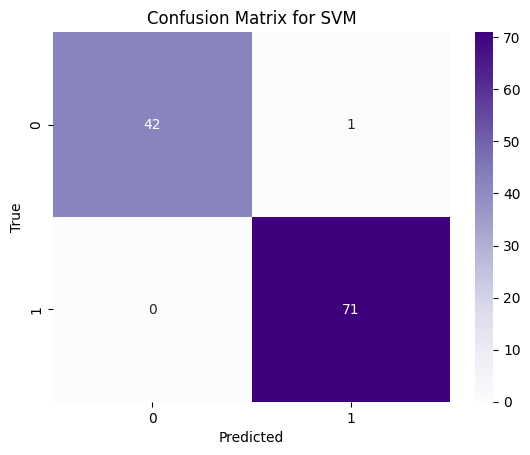

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

SVM F1-score: 0.9930


In [77]:
# Display confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt="d", cmap='Purples')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print(f"SVM Classification Report:\n", classification_report(y_test, y_pred_svc))

# SVC F1 score 
print(f"SVM F1-score: {svc_f1:.4f}")

## Logistic Regression
F1 --------> 0.9930

In [78]:
# Base logistic regression f1 score with pca
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)
y_pred_lr = lr.predict(X_test_pca)
lr_f1 = f1_score(y_test, y_pred_lr)


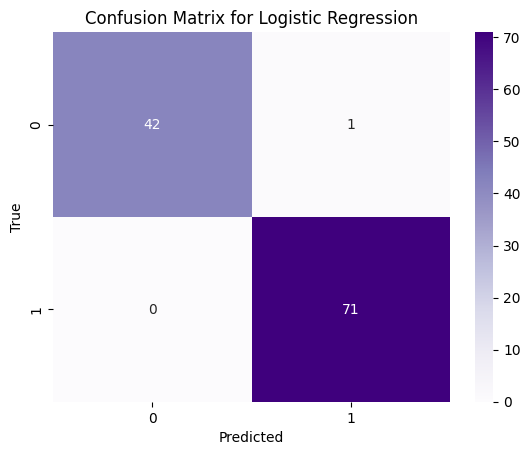

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Logistic Regressiont F1-score: 0.9930


In [79]:
# Display confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap='Purples')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print(f"Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# lr F1 score 
print(f"Logistic Regressiont F1-score: {lr_f1:.4f}")

## Naive Bayes
F1 -----------> 0.9722

In [98]:
# fit NB model
gnb = GaussianNB()
gnb.fit(X_train_rfe, y_train)
y_pred_gnb = gnb.predict(X_test_rfe)
f1_score(y_test, y_pred_gnb)

0.9722222222222222

In [110]:
# Set up RandomizedSearchCV
param_dist = {
    'var_smoothing': uniform(1e-10, 1e-8)  # Default is 1e-9
}

rs_gnb = RandomizedSearchCV(
    gnb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)


rs_gnb.fit(X_train_rfe, y_train)

y_pred_gnb = rs_gnb.best_estimator_.predict(X_test_rfe)
gnb_f1 = f1_score(y_test ,y_pred_gnb)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [111]:
rs_gnb.best_params_

{'var_smoothing': 3.845401188473625e-09}

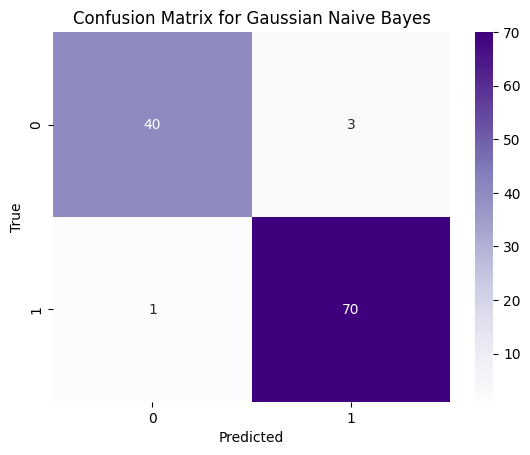

Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Gaussian Naive Bayes F1-score: 0.9722


In [112]:
# Display confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap='Purples')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print(f"Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_gnb))

# Gaussian Naive Bayes F1 score 
print(f"Gaussian Naive Bayes F1-score: {gnb_f1:.4f}")

## LightGBM
F1 ---------------> 0.9790

In [135]:
# Base lgbm f1
lgbm = LGBMClassifier(verbose=-1, random_state=42)
lgbm.fit(X_train_sc, y_train)
y_pred_lgbm = lgbm.predict(X_test_sc)
f1_score(y_test, y_pred_lgbm)

0.9722222222222222

In [136]:
# Set up RandomizedSearchCV
param_dist = {
    'num_leaves': np.arange(50, 150, 10),                     
    'max_depth': np.arange(2, 10, 2),                     
    'learning_rate': [0.001, 0.01, 0.1, 1],                   
    'n_estimators': np.arange(100, 1000, 100),               
    'min_child_samples': np.arange(10, 100, 10),                
}

rs_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=100,           
    cv=5,                     
    verbose=1,                 
    n_jobs=-1,                 
    random_state=42,           
    scoring='f1'               
)

rs_lgbm.fit(X_train_sc, y_train)

y_pred_lgbm = rs_lgbm.best_estimator_.predict(X_test_sc)
lgbm_f1 = f1_score(y_test ,y_pred_lgbm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [137]:
rs_lgbm.best_params_

{'num_leaves': 90,
 'n_estimators': 400,
 'min_child_samples': 90,
 'max_depth': 4,
 'learning_rate': 1}

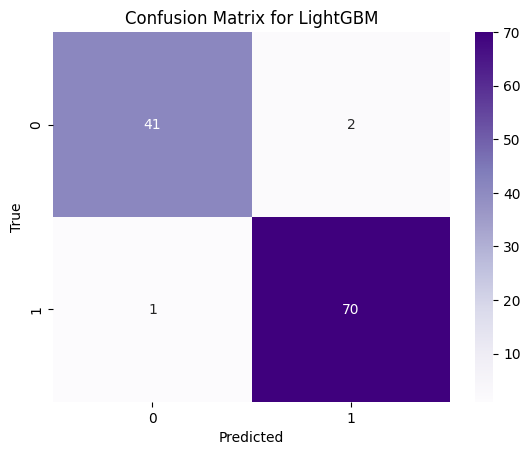

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

LightGBM F1-score: 0.9790


In [138]:
# Display confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap='Purples')
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print(f"LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))

# Gaussian Naive Bayes F1 score 
print(f"LightGBM F1-score: {lgbm_f1:.4f}")

In [148]:
scores = {
    'Random Forest': rfc_f1,
    'SVM': svc_f1,
    'Logistic Regression': lr_f1,
    'Naive Bayes': gnb_f1,
    'LightGBM': lgbm_f1
}

print("Sorted scores:")
print("-----------------------")
for model, score in sorted(scores.items(),key=lambda x:x[1], reverse=True):
    print(f"{model}: {score:.4f}")

Sorted scores:
-----------------------
SVM: 0.9930
Logistic Regression: 0.9930
Random Forest: 0.9790
LightGBM: 0.9790
Naive Bayes: 0.9722
